In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [4]:
# File to Load (Remember to Change These)
mouse_data_file = "Resources/mouse_drug_data.csv"
clinical_data_file = "Resources/clinicaltrial_data.csv"
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data=pd.read_csv(mouse_data_file)
clinical_data_file=pd.read_csv(clinical_data_file)
# Combine the data into a single dataset
combined_data=pd.merge(clinical_data_file,mouse_drug_data,how='left',on='Mouse ID')
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment
- - -

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_data_grouped=combined_data.groupby(["Drug","Timepoint"])
mean_tumor_volume=tumor_data_grouped["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
d={"Tumor Volume (mm3)":mean_tumor_volume}
mean_tumor_df=pd.DataFrame(data=d)
mean_tumor_df=mean_tumor_df.reset_index(drop=False)
# Preview DataFrame
mean_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_tumor_volume=tumor_data_grouped["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
d={"Tumor Volume (mm3)":se_tumor_volume}
se_tumor_df=pd.DataFrame(data=d)
se_tumor_df=se_tumor_df.reset_index(drop=False)
# Preview DataFrame
se_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
 # Minor Data Munging to Re-Format the Data Frames
mean_tumor_df=mean_tumor_df.pivot(index="Timepoint",columns="Drug")
# Preview that Reformatting worked
mean_tumor_df

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [8]:
 # Minor Data Munging to Re-Format the Data Frames
se_tumor_df=se_tumor_df.pivot(index="Timepoint",columns="Drug")
# Preview that Reformatting worked
se_tumor_df.columns=se_tumor_df.columns.get_level_values('Drug')

In [9]:
# Eliminate the multi index in columns to have only the drug name
mean_tumor_df.columns=mean_tumor_df.columns.get_level_values('Drug')

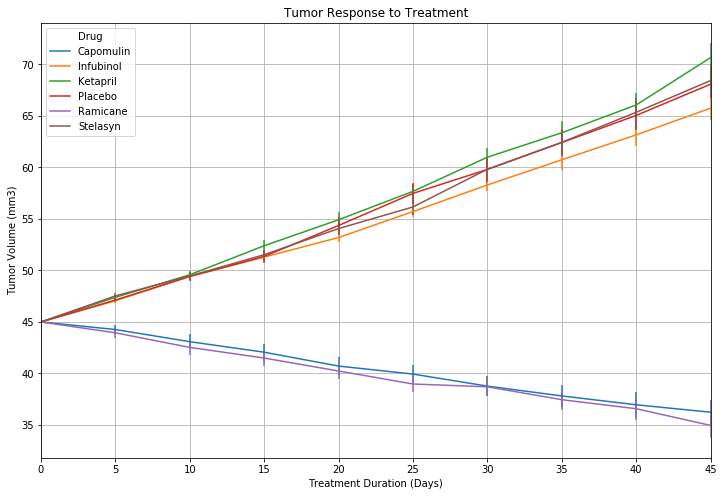

In [10]:
# Generate the Plot (with Error Bars)
ax=mean_tumor_df.loc[:,['Capomulin','Infubinol','Ketapril','Placebo','Ramicane','Stelasyn']].plot(
    kind='line',
    figsize=(12,8),
    title="Tumor Response to Treatment",
    yerr=se_tumor_df.loc[:,['Capomulin','Infubinol','Ketapril','Placebo','Ramicane','Stelasyn']],
    grid=True)
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xlabel("Treatment Duration (Days)")
# Save the Figure
plt.savefig('Tumor Response to Treatment.png')
# Show the Figure
plt.show()

## Metastatic Response to Treatment
- - -

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site=tumor_data_grouped["Metastatic Sites"].mean()
# Convert to DataFrame
d={"Metastatic Sites":mean_met_site}
mean_met_df=pd.DataFrame(data=d)
mean_met_df=mean_met_df.reset_index(drop=False)
# Preview DataFrame
mean_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
se_met_site=tumor_data_grouped["Metastatic Sites"].sem()
# Convert to DataFrame
d={"Metastatic Sites":se_met_site}
se_met_df=pd.DataFrame(data=d)
se_met_df=se_met_df.reset_index(drop=False)
# Preview DataFrame
se_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [13]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_df=mean_met_df.pivot(index="Timepoint",columns="Drug")
# Eliminate the multi index in columns to have only the drug name
mean_met_df.columns=mean_met_df.columns.get_level_values('Drug')
# Preview that Reformatting worked
mean_met_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [14]:
# Minor Data Munging to Re-Format the Data Frames
se_met_df=se_met_df.pivot(index="Timepoint",columns="Drug")
# Eliminate the multi index in columns to have only the drug name
se_met_df.columns=se_met_df.columns.get_level_values('Drug')
# Preview that Reformatting worked
se_met_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


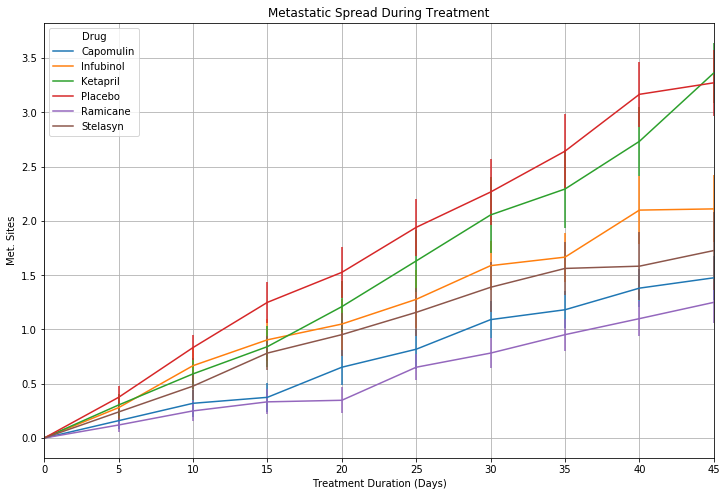

In [15]:
# Generate the Plot (with Error Bars)
met_spread_chart=mean_met_df.loc[:,['Capomulin','Infubinol','Ketapril','Placebo','Ramicane','Stelasyn']].plot(
    kind='line',
    figsize=(12,8),
    title="Metastatic Spread During Treatment",
    yerr=se_met_df.loc[:,['Capomulin','Infubinol','Ketapril','Placebo','Ramicane','Stelasyn']],
    grid=True)
met_spread_chart.set_ylabel("Met. Sites")
met_spread_chart.set_xlabel("Treatment Duration (Days)")
# Save the Figure
plt.savefig('Metastatic Spread During Treatment.png')
# Show the Figure
plt.show()

## Survival Rates
- - -

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count=tumor_data_grouped["Mouse ID"].count()
# Convert to DataFrame
d={"Mouse count":mouse_count}
mouse_count_df=pd.DataFrame(data=d)
mouse_count_df=mouse_count_df.reset_index(drop=False)
# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [17]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_df=mouse_count_df.pivot(index="Timepoint",columns="Drug")
# Eliminate the multi index in columns to have only the drug name
mouse_count_df.columns=mouse_count_df.columns.get_level_values('Drug')
# Preview the Data Frame
mouse_count_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


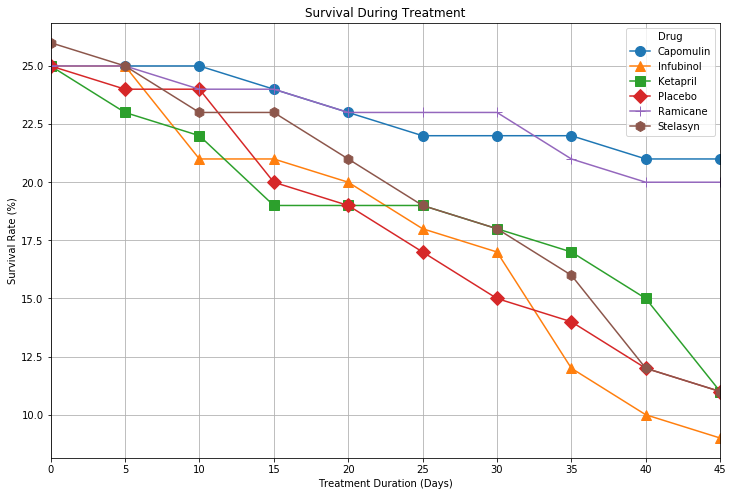

In [18]:
 # Generate the Plot (Accounting for percentages)
survival_rate_chart=mouse_count_df.loc[:,['Capomulin','Infubinol','Ketapril','Placebo','Ramicane','Stelasyn']].plot(
    kind='line',
    figsize=(12,8),
    style=['o-', '^-', 's-', 'D-', '+-', 'h-'],
    markersize=10,
    title="Survival During Treatment",
    grid=True)
survival_rate_chart.set_ylabel("Survival Rate (%)")
survival_rate_chart.set_xlabel("Treatment Duration (Days)")
# Save the Figure
plt.savefig('Survival During Treatment.png')
# Show the Figure
plt.show()

## Summary Bar Graph
- - -

In [19]:
# Calculate the percent changes for each drug
drug_percent_changes=-100+(mean_tumor_df.iloc[len(mean_tumor_df)-1,:]/mean_tumor_df.iloc[0,:])*100
# Display the data to confirm
drug_percent_changes

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

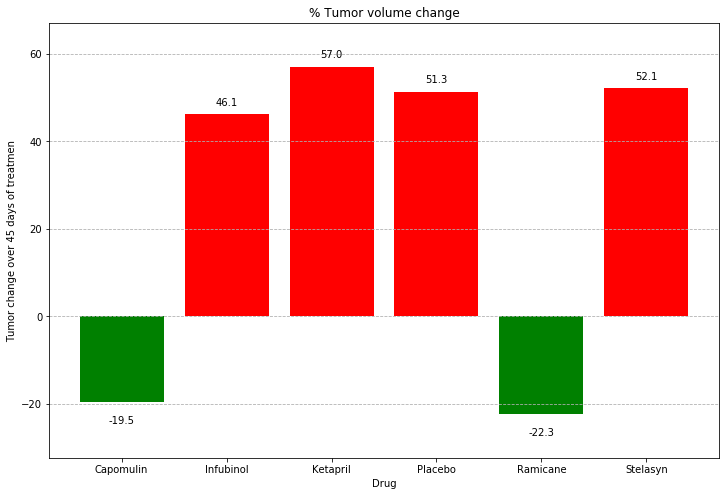

In [20]:
 # Store all Relevant Percent Changes into a Tuple
relevant_changes=(drug_percent_changes['Capomulin'],drug_percent_changes['Infubinol'],
                  drug_percent_changes['Ketapril'],drug_percent_changes['Placebo'],
                  drug_percent_changes['Ramicane'],drug_percent_changes['Stelasyn'])
relevant_drugs=["Capomulin","Infubinol","Ketapril","Placebo",'Ramicane','Stelasyn']
# Splice the data between passing and failing drugs
pass_or_fail=[(x<0)*1 for x in relevant_changes]
pass_drugs=[relevant_changes[n]*pass_or_fail[n] for n in range(len(pass_or_fail))]
fail_drugs=[relevant_changes[n]*(1-pass_or_fail[n]) for n in range(len(pass_or_fail))]
x_axis=np.arange(0,len(pass_or_fail),1)
# Orient widths. Add labels, tick marks, etc. 
plt.figure(figsize=(12,8))
pass_chart=plt.bar(x_axis,pass_drugs,width=.8,color="green")
fail_chart=plt.bar(x_axis,fail_drugs,width=.8,color="red")

plt.xticks(x_axis, relevant_drugs)
plt.title("% Tumor volume change")
plt.xlabel("Drug")
plt.ylabel("Tumor change over 45 days of treatmen")
plt.grid(axis='y',ls='--')

# Use functions to label the percentages of changes
for m in range(len(pass_or_fail)):
    plt.text(x_axis[m],relevant_changes[m]-5+(1-pass_or_fail[m])*7,"{:.1f}".format(relevant_changes[m]),
             horizontalalignment='center') 
plt.ylim(min(relevant_changes)-10,max(relevant_changes)+10)
# Call functions to implement the function calls
# Save the Figure
plt.savefig('Tumor change.png')
# Show the Figure
plt.show()